In [111]:
import pandas as pd

Za začetek shranimo podatke o knjigah, žanrih in nagradah v nove spremenljivke. Za indeksni stolpec pri vseh treh izberem "id_knjige". Ta je določen enolično, saj ga vsaka knjiga dobi glede na mestno na lestvici, mesta pa se ne ponavljajo.

Opomba: Če kdaj želimo sortirati po "score", je vseeno če sortiramo po id_knjige, saj "score" določi mesto knjige na lestvici (knjiga z najvišjim se nahaja na prvem mestu).

In [112]:
knjige = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/knjige1.csv', index_col='id_knjige')

In [113]:
knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
4,Pride and Prejudice,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,The Notebook,Nicholas Sparks,2345,True,Set amid the austere beauty of the North Carol...,2000,Grand Central Publishing,4.11,232271,2622,1370583,20323,False
97,Winnie-the-Pooh,A.A. Milne,81466,True,The adventures of Christopher Robin and his fr...,2001,Dutton Juvenile,4.32,223982,2635,282359,5017,False
98,The Complete Stories and Poems,Edgar Allan Poe,4624490,False,This single volume brings together all of Poe'...,1984,"Doubleday &amp; Company, Inc.",4.37,222915,2584,227768,2275,False


In [114]:
zanri = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zanri1.csv',index_col='id_knjige')

In [115]:
zanri

,zanr
id_knjige,
1,young-adult
1,fiction
1,dystopia
2,fantasy
2,young-adult
...,...
99,fantasy
99,fiction
100,fiction


In [116]:
nagrade = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/nagrade1.csv',index_col='id_knjige') 

In [117]:
nagrade

,nagrada
id_knjige,
1,Locus Award Nominee for Best Young Adult Book
1,Georgia Peach Book Award
1,Buxtehuder Bulle
1,Golden Duck Award for Young Adult
1,Grand Prix de l'Imaginaire Nominee for Roman j...
...,...
94,National Book Award Finalist for Fiction
95,Pulitzer Prize for Fiction
95,Premio Bancarella


# Kateri žanri so najbolj priljubljeni?

Ugotoviti želim, kateri žanri so najbolj priljubleni med prvimi desettisočimi knjigami.
Ker se lahko zgodi, da je začetnih nekaj sto knjig(najbolje ocenjene) večinoma enega žanra, večinski preostanek pa drugega, bom analizirala najbolj priljubljen žanr za prvih 100, 1000 in 10000 knjig.
Ker pri vsaki knjigi zajamem tri žanre, moram za prvih 100 knjig torej vzeti prvih 300 žanrov. Podobno za 1000 in 10000 knjig.

In [118]:
priljubljeni_zanri_100 = zanri.head(300).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [119]:
priljubljeni_zanri_100.head(10)

,st_zanrov
zanr,
fiction,91
classics,63
fantasy,25
young-adult,21
historical-fiction,18
romance,10
science-fiction,9
childrens,7
horror,6


Med prvimi stotimi knjigami je torej...

TO DO:ali priljubljenost zanra soupada z nagradami

# Ali med priljubljenemi knjigami prevladujejo serije?

Zanima nas tudi ali so bolj priljubljene serije ali posamezne knjige. 
možnost1:isto kot za zanre
moznost2:naredimo graf: y1= serije, x = vse knjige- in se y2 = ne serije, x=vse knjige->tist ki je zgoraj je večji

Za začetek poglejmo, kaj prevladuje med prvimi stotimi knjigami

In [120]:
knjige.head(100).groupby('serija').size()

serija
False    61
True     39
dtype: int64

Med knjigami na lestvici torej pravladujejo "solo" knjige, vendar pa je treba upoštevati tudi, da...
Poglejmo še, pri katerih je povprečna ocana bralcev višja(ocena od 1 do 5).

In [121]:
povprecna_ocena_serije = knjige[knjige.serija == True].povprecna_ocena.mean()

In [122]:
povprecna_ocena_solo = knjige[knjige.serija == False].povprecna_ocena.mean()

In [123]:
povprecna_ocena_serije

4.202564102564104

In [124]:
povprecna_ocena_solo

4.075901639344262

# Kateri avtorji in založbe so imeli največ uspešnic?

ideja:najti najbolj uspesnega avtorja pri najbolj priljubljenih zanrih
Znova bomo najuspešnejšega avtorja poiskali v različno velikih skupinah: 100, 1000 in 10000 knjig.

In [125]:
st_knjig_avtorja_100 = knjige[['avtor','id_avtor']].head(100).groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [126]:
st_knjig_avtorja_100

,st_knjig
id_avtor,
1077326,4
3706,2
569,2
656983,2
239579,2
...,...
3389,1
3347,1
3190,1


In [127]:
knjige[['avtor','id_avtor']]

,avtor,id_avtor
id_knjige,,
1,Suzanne Collins,153394
2,J.K. Rowling,1077326
3,Harper Lee,1825
4,Jane Austen,1265
5,Stephenie Meyer,941441
...,...,...
96,Nicholas Sparks,2345
97,A.A. Milne,81466
98,Edgar Allan Poe,4624490


In [132]:
najboljsi_avtorji_100 = pd.merge(st_knjig_avtorja,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor')

In [133]:
najboljsi_avtorji_100.drop_duplicates(keep='last').sort_values('st_knjig',ascending=False)

,id_avtor,st_knjig,avtor
3,1077326,4,J.K. Rowling
7,569,2,Khaled Hosseini
9,656983,2,J.R.R. Tolkien
11,239579,2,Charles Dickens
13,3137322,2,Fyodor Dostoyevsky
...,...,...,...
39,2778055,1,Kurt Vonnegut Jr.
38,4037220,1,Miguel de Cervantes Saavedra
37,4039811,1,Veronica Roth
36,7128,1,Jodi Picoult


J.K.Rowlin je torej napisala kar 4 izmed stotih najbolje ocenjenih knjig spletne strani....

TO DO:poiskati avtorja in zalozbo z najvec nagradami

Sedaj poiščimo še najbolj uspešno založbo.

In [134]:
st_knjig_zalozbe_100 = knjige[['zalozba']].head(100).groupby('zalozba').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [135]:
st_knjig_zalozbe_100

,st_knjig
zalozba,
Penguin,4
Penguin Books,4
Ballantine Books,4
"Little, Brown and Company",3
Scribner,2
...,...
Grand Central Publishing,1
"Farrar, Straus and Giroux",1
Ember,1


# Ali obstaja časovno obdobje, v katerem je izšla večina knjig iz vrha seznama?


In [136]:
st_knjig_po_letih = knjige.groupby('leto').size().to_frame('st_knjig_letno')

<AxesSubplot:xlabel='leto'>

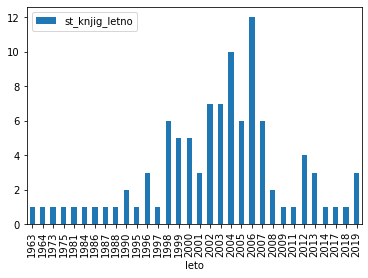

In [137]:
st_knjig_po_letih.plot.bar()

# Ali so knjige z literarnimi nagradami tudi med bralci bolje ocenjene?
Želim preveriti ali bralci knjigam z literarnimi nagradami v povprečju dajo višjo oceno, kot tistim brez nagrad. Želim tudi preveriti, ali povprečna ocena s številom nagrad narašča.

Za začetek poglejmo, ali je med knjigami več knjig z nagradami ali brez.

In [143]:
knjige.groupby('nagrade').size()

nagrade
False    36
True     64
dtype: int64

In [ ]:
Večina knjig s seznama je torej prejela vsaj eno nagrado

In [139]:
povprecna_ocena_z_nagrado = knjige[knjige.nagrade == True].povprecna_ocena.mean()

In [140]:
povprecna_ocena_z_nagrado

4.12546875

In [141]:
povprecna_ocena_brez_nagrade = knjige[knjige.nagrade == False].povprecna_ocena.mean()

In [142]:
povprecna_ocena_brez_nagrade

4.125

Vidimo, da je ocena prvih sto knjig praktično ista za knjige z nagradami in knjige brez nagrad.
Poglejmo ali se situacija spremeni, ko pogledamo večje število knjig.

Sedaj si oglejmo ali se ocena nagrajenih knjig spreminja s stevilom nagrad

In [144]:
nagrajene_knjige = knjige[knjige.nagrade == True]

In [145]:
nagrajene_knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
6,The Book Thief,Markus Zusak,11466,False,It is 1939. Nazi Germany. The country is hol...,2006,Alfred A. Knopf,4.38,1407928,14526,1909675,115407,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Don Quixote,Miguel de Cervantes Saavedra,4037220,False,Don Quixote has become so entranced by reading...,2003,Penguin Books,3.88,257217,2931,217688,8463,True
93,The Fellowship of the Ring,J.R.R. Tolkien,656983,True,"One Ring to rule them all, One Ring to find th...",1973,Ballantine Books,4.37,256662,2815,2416368,24017,True
94,Atlas Shrugged,Ayn Rand,432,False,This is the story of a man who said that he wo...,1999,Plume,3.69,249852,2745,359484,17686,True


In [149]:
ocena_in_nagrade = pd.merge(nagrajene_knjige[['povprecna_ocena']],nagrade, left_on='id_knjige', right_on='id_knjige')

In [151]:
ocena_in_nagrade

,povprecna_ocena,nagrada
id_knjige,,
1,4.32,Locus Award Nominee for Best Young Adult Book
1,4.32,Georgia Peach Book Award
1,4.32,Buxtehuder Bulle
1,4.32,Golden Duck Award for Young Adult
1,4.32,Grand Prix de l'Imaginaire Nominee for Roman j...
...,...,...
94,3.69,National Book Award Finalist for Fiction
95,3.79,Pulitzer Prize for Fiction
95,3.79,Premio Bancarella


In [154]:
knjige['st_nagrad']=ocena_in_nagrade.groupby('id_knjige').size().to_frame('st_nagrad')

In [160]:
ocena_z_nagradami = knjige.groupby('st_nagrad').povprecna_ocena.mean()

<AxesSubplot:xlabel='st_nagrad'>

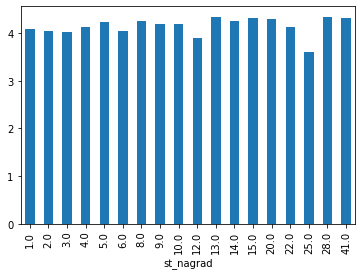

In [162]:
ocena_z_nagradami.plot.bar()